In [117]:
# 1. Gerekli Kütüphaneleri İçe Aktarma

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 2. Veri Setini Yükleme
# Veri seti yolunuza göre değiştirin
df = pd.read_csv('credit_risk.csv')  # Dosya yolunu kendi yolunuza göre değiştirin

In [118]:
# 3. Veri Setinin Genel Bakışı
df.head()  # İlk 5 satırı kontrol et
df.info()  # Veri türlerini kontrol et
df.describe()  # Sayısal verileri özetle


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16290.006139,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.479594,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8145.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16290.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24435.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32780.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [119]:
# 4. Kategorik ve Sayısal Sütunları Ayırma
# Kategorik sütunları tespit edelim
categorical_cols = df.select_dtypes(include=['object']).columns

print("Kategorik Sütunlar:", categorical_cols)

Kategorik Sütunlar: Index(['Home', 'Intent', 'Default'], dtype='object')


In [120]:
# 5. Kategorik Verilerin Sayısala Dönüştürülmesi

# Label Encoding kullanarak kategorik verileri sayısala dönüştürelim
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


    
# Veri setini tekrar kontrol edelim
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,3,123.0,4,35000,16.02,1,0.59,1,3
1,1,21,9600,2,5.0,1,1000,11.14,0,0.10,0,2
2,2,25,9600,0,1.0,3,5500,12.87,1,0.57,0,3
3,3,23,65500,3,4.0,3,35000,15.23,1,0.53,0,2
4,4,24,54400,3,8.0,3,35000,14.27,1,0.55,1,4


In [121]:
# 6. Bağımlı (y) ve Bağımsız (X) Değişkenleri Ayıralım
y = df['Status']  # Hedef değişken

X = df.drop([
'Id', 'Status'], axis=1) # Özellikler, 'Id' ve 'Status' sütunlarını kaldırıyoruz

In [122]:
# 7. Eğitim ve Test Verilerini Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)


In [123]:
# 8. Random Forest Modelini Oluşturma ve Eğitme

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Örnek veri seti (df) üzerinden çalışıyoruz
# Bağımsız değişkenler ve hedef değişken
X = df.drop(columns=['Id', 'Status'])  # Hedef değişken 'Status' ve 'Id' hariç tutulur
y = df['Status']

# Kategorik veriyi sayısal hale getirmek için One-Hot Encoding uygulama
X = pd.get_dummies(X, drop_first=True)

# Hedef değişkeni sayısal hale getirme (Label Encoding)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 'Status' değişkeni sayısala çevrilir

# Eğitim ve test verisi olarak ayırma (Veri setinin %30'u test için, %70'i eğitim için)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# Random Forest modelini oluşturma ve eğitme
rf_model = RandomForestClassifier(random_state=46, n_estimators=200)
rf_model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = rf_model.predict(X_test)

# Modelin doğruluk oranını ve diğer metrikleri yazdırma
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Skoru:", accuracy)
print(classification_report(y_test, y_pred))


Doğruluk Skoru: 0.9149872122762148
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7629
           1       0.93      0.66      0.77      2146

    accuracy                           0.91      9775
   macro avg       0.92      0.82      0.86      9775
weighted avg       0.92      0.91      0.91      9775



In [124]:
# 10. Modelin Performansını Değerlendirme
accuracy = accuracy_score(y_test, y_pred)


print("Doğruluk Skoru:", accuracy)
# Sınıflandırma raporu (Precision, Recall, F1-Score)
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Skoru: 0.9149872122762148

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7629
           1       0.93      0.66      0.77      2146

    accuracy                           0.91      9775
   macro avg       0.92      0.82      0.86      9775
weighted avg       0.92      0.91      0.91      9775



In [125]:
import matplotlib.pyplot as plt

# Özelliklerin önem derecelerini elde etme
feature_importances = rf_model.feature_importances_


In [126]:
# Özelliklerin isimlerini alalım
features = X.columns

# Özelliklerin önem derecelerini sıralayalım
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

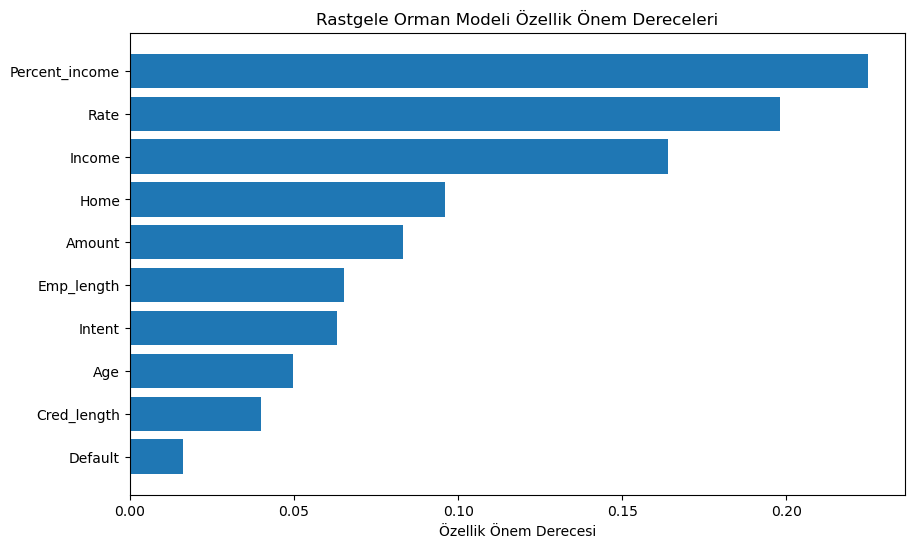

In [127]:
# Grafik ile görselleştirelim
plt.figure(figsize=(
10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Özellik Önem Derecesi')
plt.title('Rastgele Orman Modeli Özellik Önem Dereceleri')
plt.gca().invert_yaxis()
plt.show()



C:\Users\xxxx\AppData\Local\Temp\ipykernel_19512\3201399071.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_counts.index, y=approval_counts.values, palette="viridis")


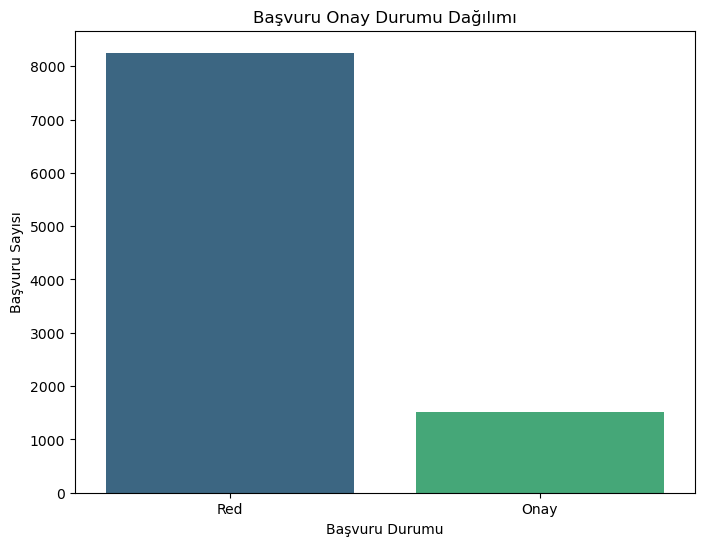

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Onaylanan ve reddedilen başvuruları ayıralım
df_test = X_test.copy()  # Test verisi
df_test['Predicted Status'] = y_pred  # Modelin tahmin ettiği başvuru durumu

# Başvuru durumunu onay (1) ve red (0) olarak etiketledik.
df_test['Status'] = y_test  # Gerçek değerler (test setindeki gerçek başvuru durumu)

# Onay ve red dağılımını gösterelim
approval_counts = df_test['Predicted Status'].value_counts()
approval_counts.index = approval_counts.index.map({1: 'Onay', 0: 'Red'})

# Başvuru durumu grafiği
plt.figure(figsize=(8, 6))
sns.barplot(x=approval_counts.index, y=approval_counts.values, palette="viridis")
plt.title('Başvuru Onay Durumu Dağılımı')
plt.ylabel('Başvuru Sayısı')
plt.xlabel('Başvuru Durumu')
plt.show()


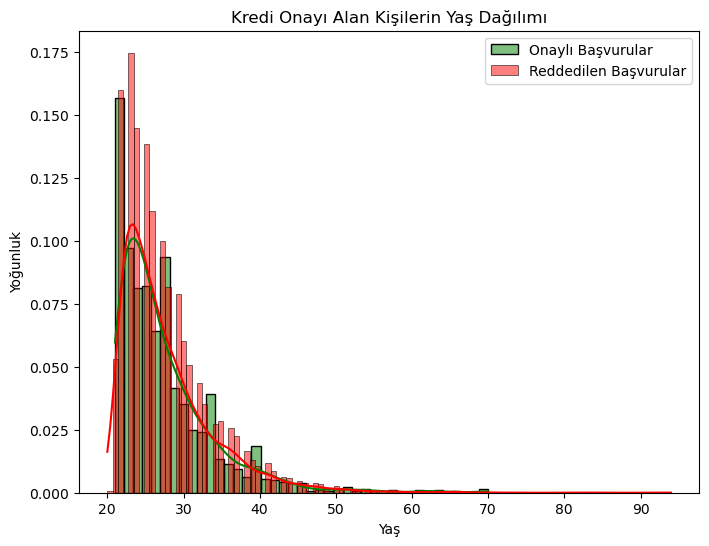

In [129]:
# Kredi onayı alanların yaş dağılımını görselleştirelim
df_approved = df_test[df_test['Predicted Status'] == 1]  # Kredi onayı alan kişiler
df_rejected = df_test[df_test['Predicted Status'] == 0]  # Kredi reddedilen kişiler

plt.figure(figsize=(8, 6))
sns.histplot(df_approved['Age'], kde=True, color='green', label='Onaylı Başvurular', stat="density")
sns.histplot(df_rejected['Age'], kde=True, color='red', label='Reddedilen Başvurular', stat="density")
plt.title('Kredi Onayı Alan Kişilerin Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Yoğunluk')
plt.legend()
plt.show()


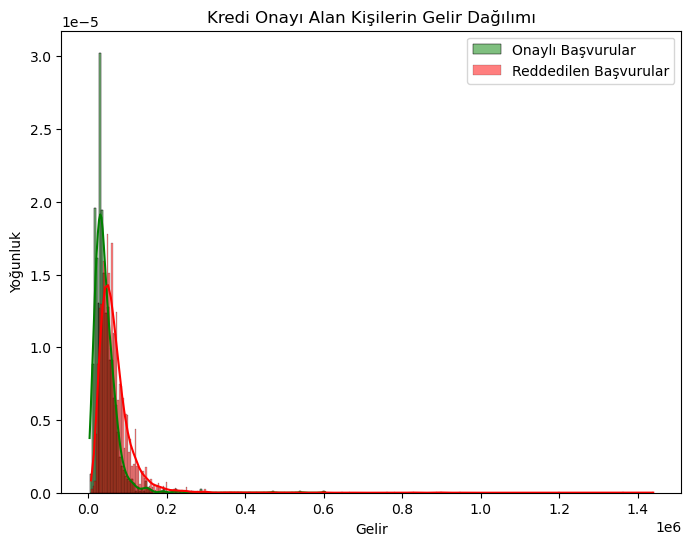

In [130]:
# Kredi onayı alanların gelir dağılımını görselleştirelim
plt.figure(figsize=(8, 6))
sns.histplot(df_approved['Income'], kde=True, color='green', label='Onaylı Başvurular', stat="density")
sns.histplot(df_rejected['Income'], kde=True, color='red', label='Reddedilen Başvurular', stat="density")
plt.title('Kredi Onayı Alan Kişilerin Gelir Dağılımı')
plt.xlabel('Gelir')
plt.ylabel('Yoğunluk')
plt.legend()
plt.show()


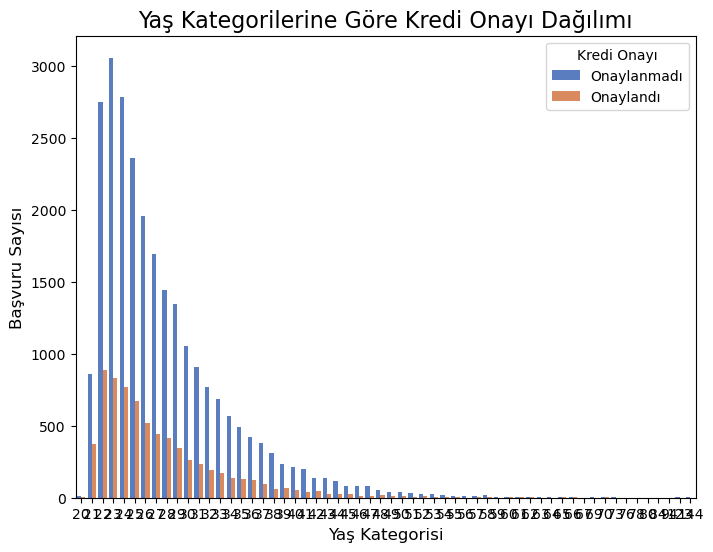

In [134]:
# Yaş kategorisi ve kredi onayı arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', hue='Status', data=df, palette='muted')

plt.title('Yaş Kategorilerine Göre Kredi Onayı Dağılımı', fontsize=16)
plt.xlabel('Yaş Kategorisi', fontsize=12)
plt.ylabel('Başvuru Sayısı', fontsize=12)
plt.legend(title='Kredi Onayı', loc='upper right', labels=['Onaylanmadı', 'Onaylandı'])
plt.show()


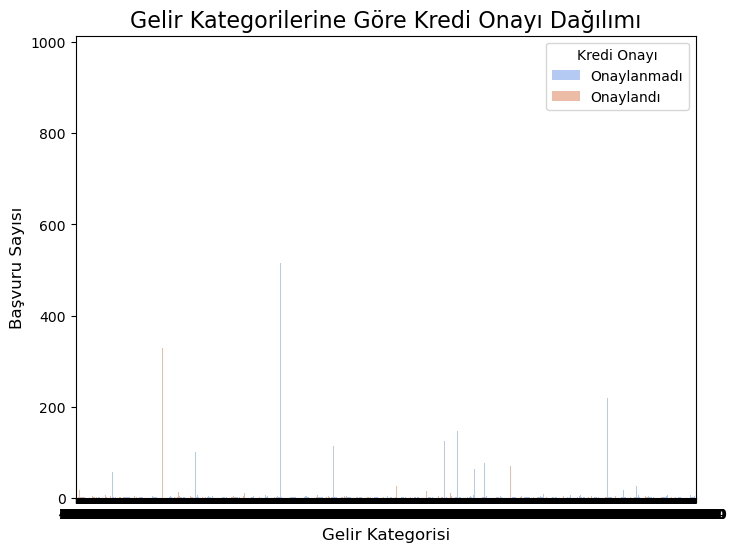

In [137]:
# Gelir kategorisi ve kredi onayı arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', hue='Status', data=df, palette='coolwarm')

plt.title('Gelir Kategorilerine Göre Kredi Onayı Dağılımı', fontsize=16)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Başvuru Sayısı', fontsize=12)
plt.legend(title='Kredi Onayı', loc='upper right', labels=['Onaylanmadı', 'Onaylandı'])
plt.show()


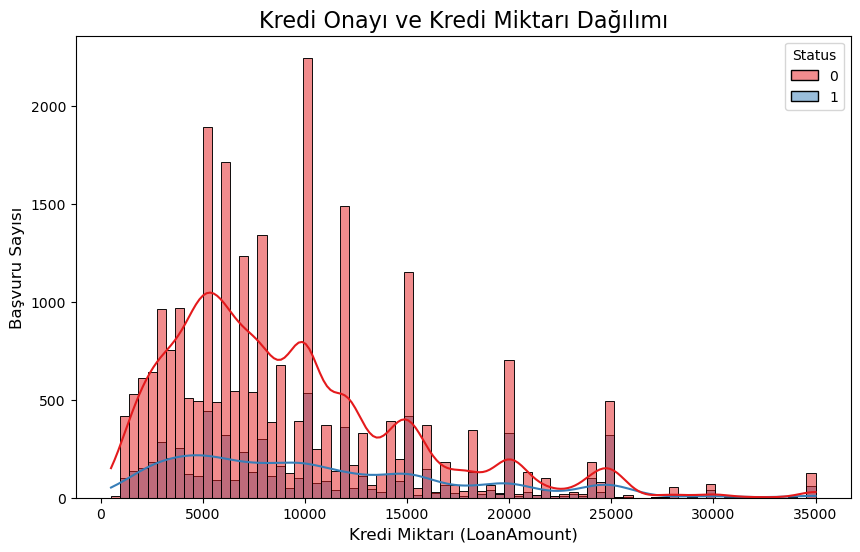

In [143]:
# Kredi onayı ve kredi tutarının dağılımını histogramla inceleyelim
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Status', kde=True, palette='Set1')

plt.title('Kredi Onayı ve Kredi Miktarı Dağılımı', fontsize=16)
plt.xlabel('Kredi Miktarı (LoanAmount)', fontsize=12)
plt.ylabel('Başvuru Sayısı', fontsize=12)
plt.show()



C:\Users\xxxx\AppData\Local\Temp\ipykernel_19512\1064473897.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='scaled_income', data=df, palette='Blues')


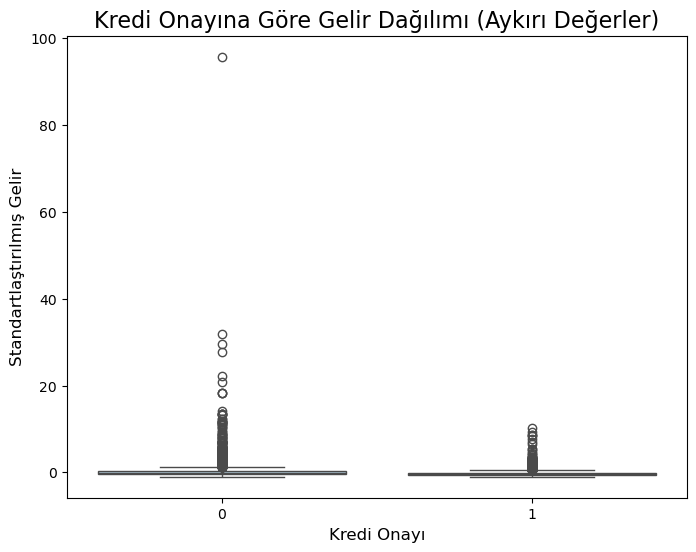

In [139]:
# Aykırı değerler için sayısal özellikler kullanarak filtreleme yapalım
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_income'] = scaler.fit_transform(df[['Income']])

# Aykırı değerler için gelir değişkenini inceleyelim
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='scaled_income', data=df, palette='Blues')

plt.title('Kredi Onayına Göre Gelir Dağılımı (Aykırı Değerler)', fontsize=16)
plt.xlabel('Kredi Onayı', fontsize=12)
plt.ylabel('Standartlaştırılmış Gelir', fontsize=12)
plt.show()
